In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,roc_auc_score,auc 
from sklearn import tree   
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from   sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
from   scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.preprocessing import TransactionEncoder
heart = pd.read_csv("heart.csv", encoding="ISO-8859-1")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='age'>

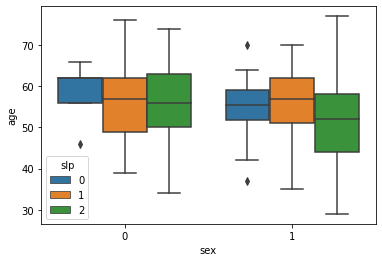

In [61]:
import seaborn as sns
sns.boxplot(data=heart, x='sex', y='age', hue ='slp')


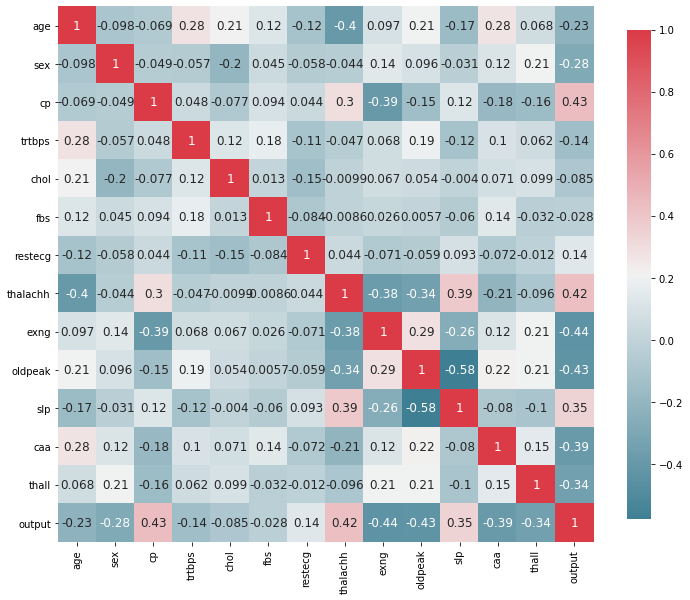

In [62]:
def plot_correlation_map( heart ):

    corr = heart.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(heart)

In [63]:
heart[["trtbps","chol","cp","sex"]].groupby(["sex"], as_index=True).mean()

,trtbps,chol,cp
sex,,,
0,133.083333,261.302083,1.041667
1,130.946860,239.289855,0.932367


In [64]:
from sklearn.model_selection import train_test_split
X=heart[['chol']]
y=heart['age']
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.20, random_state=30)


In [65]:
len(X_test)

61

In [66]:
len(X_train)

242

In [67]:
X_train

,chol
26,212
87,197
40,308
128,196
12,266
...,...
145,245
251,247
140,295
301,131


In [68]:
model=LinearRegression()   #build linear regression model
model.fit(X_train,y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance

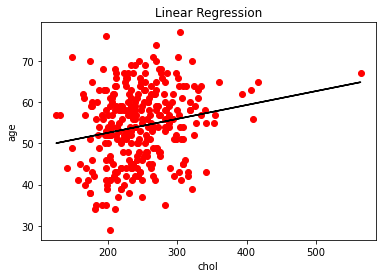

In [69]:
plt.scatter(X,y,color="r")
plt.title("Linear Regression")
plt.ylabel("age")
plt.xlabel("chol")
plt.plot(X,model.predict(X),color="k")
plt.show()

In [70]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 68.07940118733976
R squared 0.07744165142653281


In [101]:
x=heart[['thalachh','cp']]
y=heart["fbs"]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.87


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

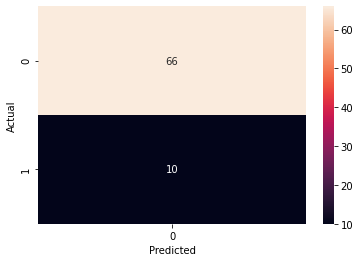

In [102]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [103]:
x = heart.iloc[:,0:-1].values
y=heart.iloc[:,-1].values

In [104]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [105]:
logistic_fpr,logistic_tpr,threshold = roc_curve(y_test,y_pred)
auc_logistic = auc(logistic_fpr,logistic_tpr)

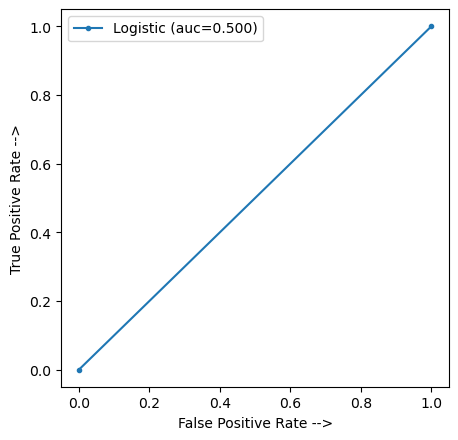

In [106]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr, marker='.',label="Logistic (auc=%0.3f)" %auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [109]:
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   
y_pred=tree1.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7763157894736842


In [110]:
import sklearn
print(sklearn.__version__)

0.23.2


In [115]:
tree2 = tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
tree2.fit(x_train, y_train)   
y_pred=tree2.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.868421052631579


In [116]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7763157894736842


In [117]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [122]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(heart)

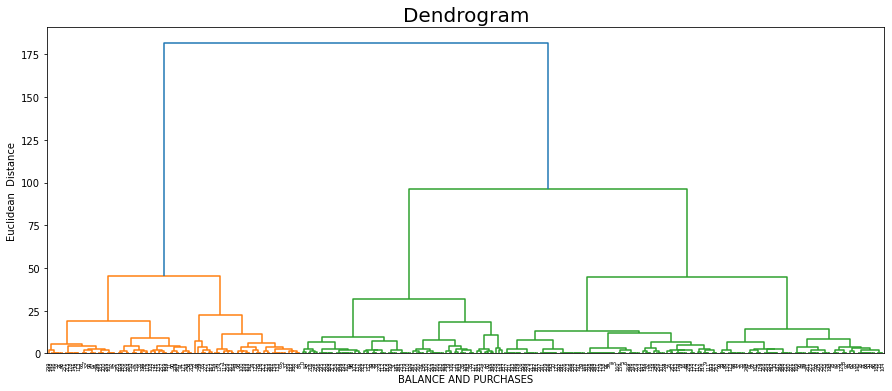

In [124]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(heart.iloc[:,[0,2]].values, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('BALANCE AND PURCHASES')
plt.ylabel('Euclidean  Distance')
plt.show()

In [126]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(heart)

In [127]:
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(heart)

KMeans(n_clusters=6, random_state=0)

In [128]:
kmeans.labels_

array([5, 5, 0, 5, 3, 0, 3, 5, 0, 0, 5, 1, 5, 4, 3, 5, 3, 4, 5, 5, 5, 5,
       5, 1, 0, 3, 0, 4, 2, 0, 0, 4, 0, 1, 4, 0, 3, 5, 1, 3, 3, 5, 0, 1,
       3, 3, 5, 5, 4, 5, 5, 3, 5, 0, 5, 0, 5, 5, 0, 3, 1, 3, 0, 4, 0, 0,
       5, 5, 5, 0, 5, 5, 0, 5, 0, 5, 5, 5, 0, 5, 5, 3, 3, 3, 1, 2, 1, 0,
       0, 1, 5, 0, 5, 3, 4, 4, 2, 5, 3, 5, 5, 1, 0, 5, 0, 4, 1, 5, 5, 5,
       3, 0, 3, 0, 5, 0, 0, 0, 0, 5, 3, 5, 5, 5, 0, 0, 4, 3, 0, 1, 0, 5,
       3, 5, 3, 5, 4, 4, 4, 1, 3, 3, 0, 5, 4, 1, 5, 5, 5, 0, 5, 4, 5, 1,
       5, 4, 5, 0, 5, 5, 5, 3, 0, 0, 0, 1, 4, 5, 5, 0, 1, 5, 3, 5, 4, 4,
       5, 3, 4, 1, 3, 4, 3, 5, 1, 3, 5, 1, 5, 0, 3, 4, 4, 1, 0, 3, 5, 5,
       1, 5, 0, 1, 1, 1, 4, 5, 5, 5, 4, 0, 5, 1, 4, 3, 5, 3, 1, 3, 1, 5,
       2, 4, 3, 1, 1, 4, 1, 4, 3, 3, 5, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       4, 1, 4, 5, 2, 1, 3, 1, 3, 5, 1, 3, 1, 3, 1, 4, 5, 5, 5, 5, 1, 5,
       4, 4, 3, 4, 1, 1, 5, 5, 1, 5, 1, 0, 4, 1, 3, 4, 3, 0, 4, 5, 4, 3,
       0, 5, 3, 4, 0, 3, 5, 0, 4, 4, 4, 4, 1, 1, 4,

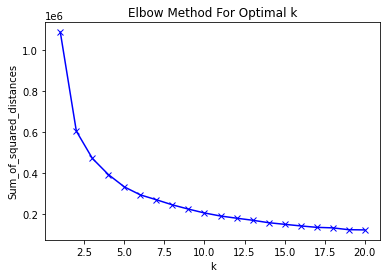

In [130]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(heart)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()